# Assignment 2 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [1]:
# Task 1 
# Generate sample data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=0.4,random_state=0)

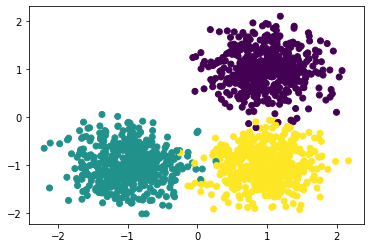

In [2]:
plt.scatter(X[:,0],X[:,1], c=y)

In [3]:
# Task 2 
import numpy as np
rawdata=np.loadtxt('semeion.data');
x=rawdata[:,0:256].copy()
t=rawdata[:,-10:rawdata.shape[1]].copy()
del(rawdata)
t=np.sign(t-.5)

In [4]:
X.shape[1]

2

In [66]:
def Kmeans_c(clusters, iterations, X):
    """ 
        The function takes in 3 inputs
        clusters: Number of clusters to be clustered on. 
        iterations: The number of iterations to choose the best model
        X: The data to be clustered
        
    """
    km = []
    models = []
    for i in range(iterations+1):
        centroids = np.random.rand(clusters,X.shape[1])
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=clusters, random_state=0, init = centroids, n_init=1).fit(X)
        km.append(kmeans.inertia_)
        models.append(kmeans)
    
    min_in = min(km)
    low_iner_mod = models[km.index(min_in)]
    
    print("Inertia for the models")
    print(km)
    print()
    
    print("Min Inertia")
    print(min_in)
    
    print()
    print("Low Inertia model")
    print(low_iner_mod)
    
    return low_iner_mod 
        
best_model = Kmeans_c(6, 10, X)

Inertia for the models
[312.14184565955566, 312.1440604771447, 314.22912987032015, 312.3636733170638, 312.9305272726249, 311.3391568359371, 309.63096732495916, 312.1418456595556, 311.3428815803688, 311.06322950624946, 300.82775136653476]

Min Inertia
300.82775136653476

Low Inertia model
KMeans(init=array([[0.83573416, 0.28953492],
       [0.91646984, 0.20756403],
       [0.79447183, 0.1153643 ],
       [0.33608498, 0.79688509],
       [0.51917504, 0.33935938],
       [0.24906303, 0.68790594]]),
       n_clusters=6, n_init=1, random_state=0)


In [104]:
def d_model(km,y):
    
    """ 
             Takes in two variables 
             trained k_means model 
             y: as a numpy array for the target
             prints the class distribution of the model 
    """
    blabs = np.unique(km.labels_)
    for i in blabs:
        distribution = y[km.labels_==i]
        count = np.unique(distribution, return_counts=True)
        print("Cluster :",i, "Class count :",count)

d_model(best_model,y)       

Cluster : 0 Class count : (array([0]), array([249]))
Cluster : 1 Class count : (array([0, 1, 2]), array([  9,   2, 231]))
Cluster : 2 Class count : (array([1, 2]), array([  3, 264]))
Cluster : 3 Class count : (array([0]), array([242]))
Cluster : 4 Class count : (array([1, 2]), array([293,   5]))
Cluster : 5 Class count : (array([1]), array([202]))


In [6]:
# Distortion 
best_model.inertia_

297.3759447935723

In [7]:
# Number of clusters
best_model.cluster_centers_

array([[ 1.16796313,  1.21685471],
       [ 0.5775501 , -1.06998464],
       [ 0.73714123,  0.74373074],
       [ 1.22886619, -0.94938124],
       [-0.87846399, -1.21019929],
       [-1.21018194, -0.67452512]])

In [8]:
# Number of iterations 
best_model.n_iter_

7

In [9]:
# Predictions 
predict = best_model.predict(X)
predict

array([4, 3, 4, ..., 2, 4, 0], dtype=int32)

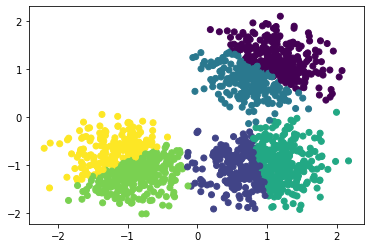

In [10]:
# Plot the predictions
plt.scatter(X[:,0],X[:,1], c=predict)

In [11]:
#cluster_membership = np.argmax(u, ax
def fcmeans(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    print("Centers")
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(X[:,0], X[:,1])
    axes[1].scatter(X[:,0], X[:,1], c=pred)
    axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    plt.show()
    return centers, pred

In [172]:
#cluster_membership = np.argmax(u, ax
def fcmeans2(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    #print("Centers")
    #f, axes = plt.subplots(1, 2, figsize=(11,5))
    #axes[0].scatter(X[:,0], X[:,1])
    #axes[1].scatter(X[:,0], X[:,1], c=pred)
    #axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    #plt.show()
    return centers, pred

Centers


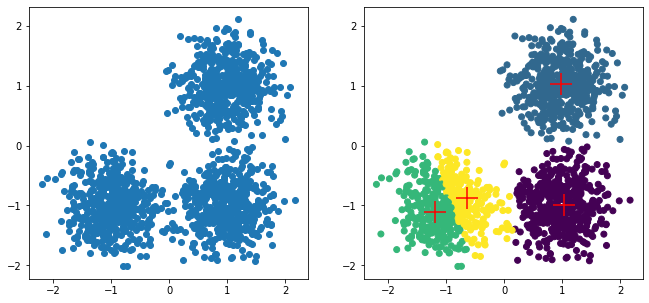

In [83]:
test = fcmeans(X,4)

In [103]:
#np.unique(test[1])
def d_fcmeans(labels,y):
    """ 
        Takes in a numpy array of labels. 
        Prints out the distribution of the clusters.
        Takes in y as numpy array of targets.
        
    """
    blabs = np.unique(labels[1])
    for i in blabs:
        distribution = y[labels[1]==i]
        count = np.unique(distribution, return_counts=True)
        print("Cluster :",i, "Class count :",count)
d_fcmeans(test,y)      

Cluster : 0 Class count : (array([0, 1, 2]), array([  6,   1, 490]))
Cluster : 1 Class count : (array([0]), array([494]))
Cluster : 2 Class count : (array([1]), array([279]))
Cluster : 3 Class count : (array([1, 2]), array([220,  10]))


For i  1
Centers


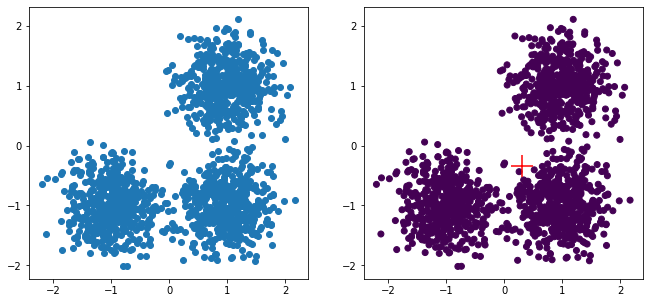

For i  2
Centers


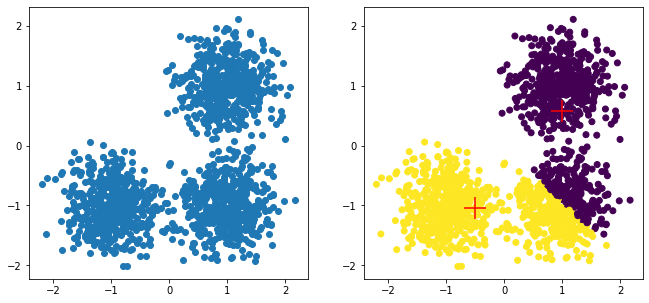

For i  3
Centers


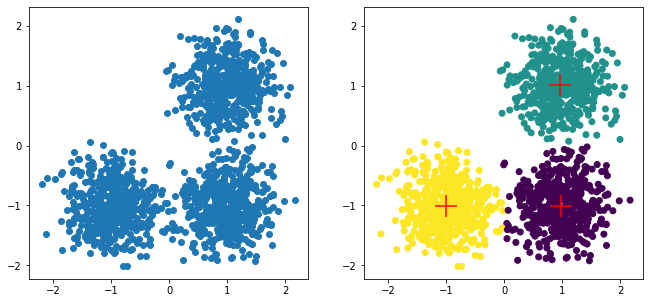

For i  4
Centers


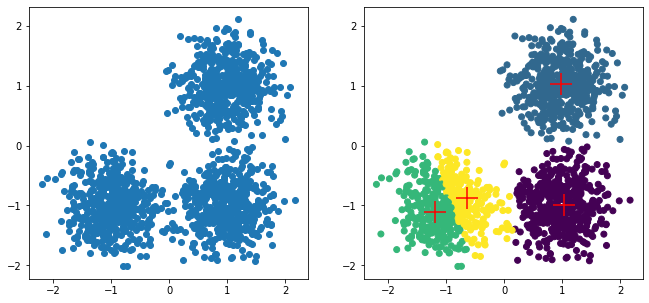

For i  5
Centers


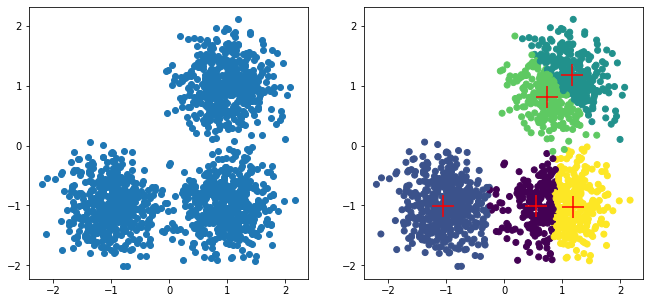

In [13]:
#Trying the algorithm out on different clusters 
for i in range(5):
    print("For i ", i+1)
    fcmeans(X,i+1)
 

In [14]:
def PossiblisticC(data, nclusters,centroids, iterations):
    """ This function takes in 4 variables 
        data : This is the data to be clustered as a numpy array.
        nclusters: The number of clusters as an int
        centroids: The initial centers as numpy array
        iterations: The max iteration as an int """
    
    from skcmeans.algorithms import Possibilistic
    clusters = Possibilistic(n_clusters=nclusters, n_init=5, max_iter=iterations)
    fitd = clusters.fit(data)
    membership = fitd.calculate_memberships(data)
    centers = fitd.calculate_centers(data)
    #print(centers)
    
    return membership, centers

In [92]:
def use_posbc(itera,clusters,data):
    """ This function takes in 2 variables 
        itera: Number of iterations as an int
        clusters: As an int 
        returns an array of labels from the iteratations 
    """
    labels = []
    centers = []
    for i in range(itera):
        initC = np.random.rand(clusters,2)*10
        membership = PossiblisticC(data,clusters,initC,5)
        plabels = np.argmax(membership[0], axis=1)
        centers.append(membership[1])
        labels.append(plabels)
    return labels ,centers
    
labs = use_posbc(5,5,X)

In [101]:
def d_possbl(labels,y):
    """ 
        Takes in a numpy array of labels. 
        Prints out the distribution of the clusters.
        Takes in y as numpy array of targets.
        
    """
    blabs = np.unique(labels[0][1])
    for i in blabs:
        distribution = y[labels[0][1]==i]
        count = np.unique(distribution, return_counts=True)
        print("Class :",i, "Count :",count)
        
d_possbl(labs,y)

Class : 0 Count : (array([2]), array([80]))
Class : 1 Count : (array([0, 2]), array([29, 29]))
Class : 2 Count : (array([0]), array([471]))
Class : 3 Count : (array([1, 2]), array([  1, 381]))
Class : 4 Count : (array([1, 2]), array([499,  10]))


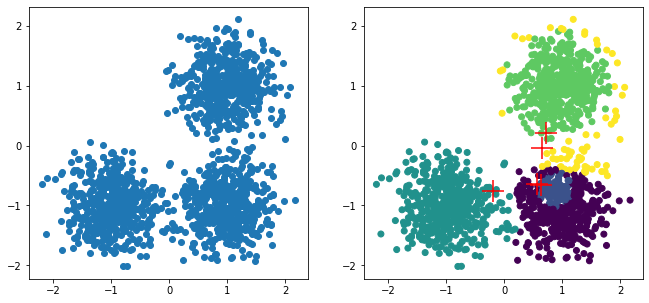

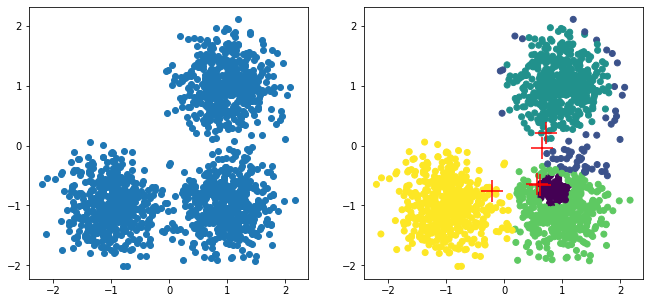

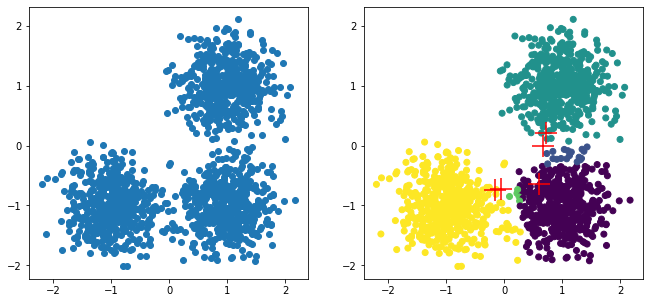

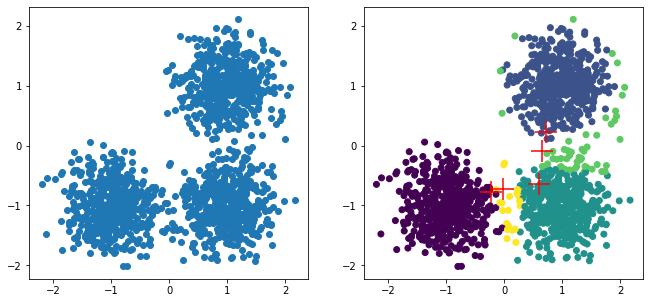

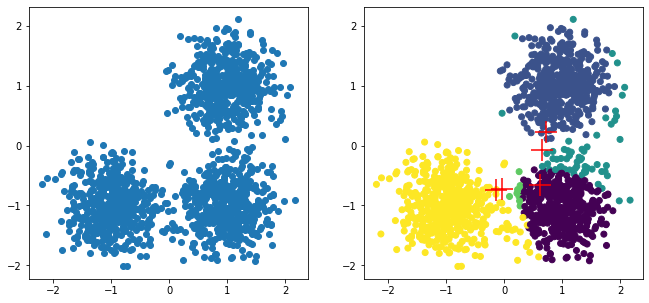

In [94]:
# Plot the output from the  5 iterations 
def plot_it(data,labels):
    """
      This takes in 2 variables. 
      data - This is a numpy array
      labels - This is a tuple of results from use_posbc()
    """
    for i, j in zip(labels[0],labels[1]):
        f, axes = plt.subplots(1, 2, figsize=(11,5))
        axes[0].scatter(data[:,0], data[:,1])
        axes[1].scatter(data[:,0], data[:,1], c=i)
        axes[1].scatter(j[:,0], j[:,1], marker="+", s=500, c='r')
        
plot_it(X,labs)

In [19]:
 #np.any([[True, False], [False, False]], where=[[False], [True]])
            
            #if(np.where(labs[0][i]==i) not in indices):
               # indices.append(np.where(labs[0][i]==i))

## Task 4

In [20]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(x)
reduced_data.shape

(1593, 2)

## Possiblistic Cmeans

In [21]:
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [22]:
type(data)

numpy.ndarray

In [23]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)
class_labels = use_posbc(5,5,reduced_data)

In [185]:
clebs = use_posbc(10,10,x) 
#Distribution of class labels 
d_possbl(clebs,tcat)

Class : 3 Count : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([161, 162, 159, 159, 161, 159, 161, 158, 155, 158]))


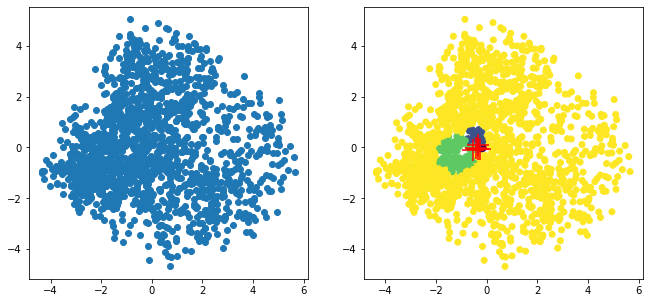

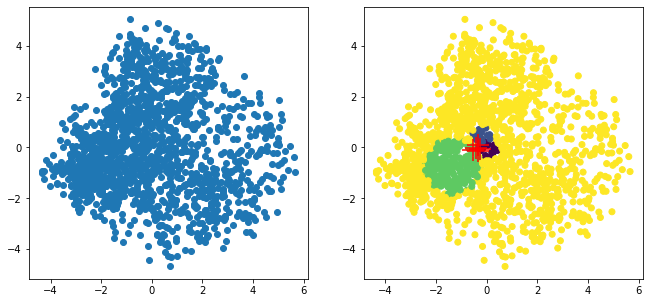

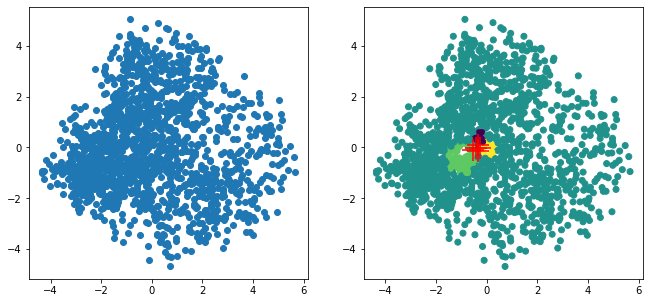

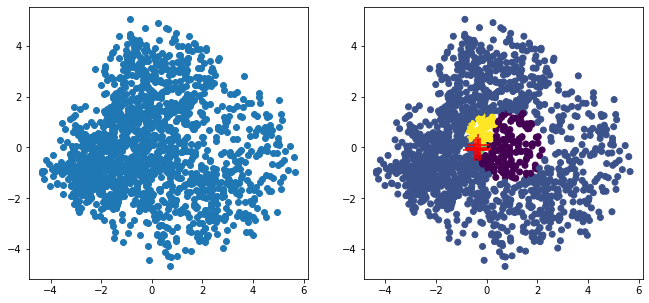

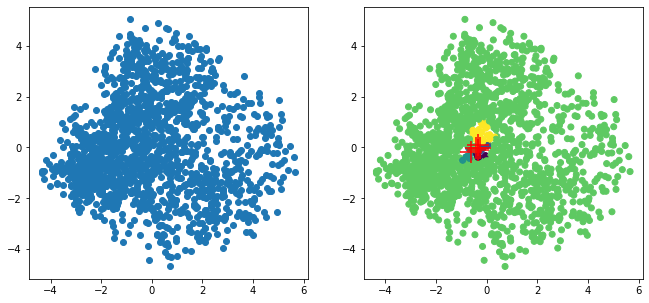

In [24]:
#class_labels for the handritting data
plot_it(reduced_data,class_labels)

## Cmeans

Centers


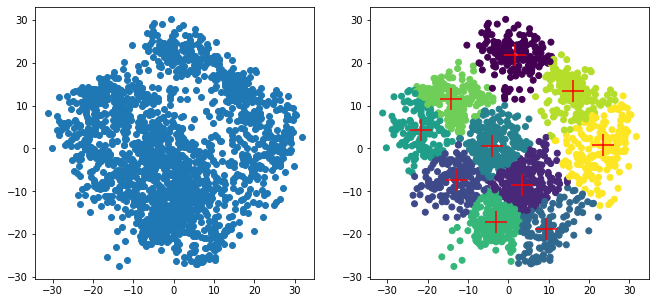

In [186]:
tesC = fcmeans(reduced_data,10) 

In [187]:
#All the data clustering distribution
tesB = fcmeans2(x,10)

In [188]:
d_fcmeans(tesB,tcat) 

Cluster : 0 Class count : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([101,   7,  39,  85,  52, 114,  83,   4,  60,  78]))
Cluster : 1 Class count : (array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([148, 109,  65,  36,  24,  15, 153,  77,  59]))
Cluster : 2 Class count : (array([0, 2, 3, 4, 5, 6, 8]), array([ 8,  2,  3, 16,  2,  2,  2]))
Cluster : 3 Class count : (array([0, 2, 4, 5, 6, 8, 9]), array([5, 2, 2, 5, 2, 4, 6]))
Cluster : 4 Class count : (array([0, 1, 3, 4, 5, 6, 7, 8, 9]), array([1, 6, 2, 3, 2, 3, 1, 5, 4]))
Cluster : 5 Class count : (array([1, 4, 5, 6, 8, 9]), array([1, 9, 3, 1, 1, 3]))
Cluster : 6 Class count : (array([2, 4, 6, 8]), array([1, 2, 2, 3]))
Cluster : 7 Class count : (array([0, 2, 4, 5, 6, 8, 9]), array([46,  2, 36,  8, 53,  3,  6]))
Cluster : 8 Class count : (array([2, 4]), array([1, 5]))
Cluster : 9 Class count : (array([2, 3, 5, 9]), array([3, 4, 1, 2]))


## Kmeans

In [189]:
best_modelt = Kmeans_c(10, 10, x)

Inertia for the models
[66620.8977506475, 66591.14956269696, 66685.8504246486, 67183.38137137372, 66436.5101070591, 67206.30656780118, 66557.9478949608, 67144.16468588402, 66326.80815829214, 66392.03235667784, 66430.81409268525]

Min Inertia
66326.80815829214

Low Inertia model
KMeans(init=array([[0.42742846, 0.05976573, 0.92739747, ..., 0.70892937, 0.39768295,
        0.77941788],
       [0.93751939, 0.82622523, 0.53539224, ..., 0.60291903, 0.57405723,
        0.62787262],
       [0.48515136, 0.87452348, 0.85605008, ..., 0.6261495 , 0.1347883 ,
        0.11922431],
       ...,
       [0.70446478, 0.7270692 , 0.35826775, ..., 0.61077212, 0.00998715,
        0.97079388],
       [0.73165291, 0.68999655, 0.12891036, ..., 0.93744054, 0.18751281,
        0.392691  ],
       [0.75299619, 0.16097884, 0.67543367, ..., 0.45796703, 0.28338025,
        0.21892299]]),
       n_clusters=10, n_init=1, random_state=0)


In [191]:
lbs = best_modelt.labels_
tcat = np.argmax(t, axis = 1) # Convert all the columns to one categorical column
lbs.shape
np.unique(tcat)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [194]:
#The distribution of the data in clusters
d_model(best_modelt,tcat)

Cluster : 0 Class count : (array([5, 6, 8]), array([ 1, 83,  2]))
Cluster : 1 Class count : (array([1, 2, 3, 4, 7, 8, 9]), array([98, 17,  6,  9, 18,  1,  3]))
Cluster : 2 Class count : (array([0, 1, 2, 3, 4, 5, 6, 7, 9]), array([ 5,  4,  4,  1, 48,  6, 65,  2,  1]))
Cluster : 3 Class count : (array([0, 2, 3, 5, 7, 8, 9]), array([ 4, 32, 11, 12,  1, 85, 21]))
Cluster : 4 Class count : (array([0, 2, 4, 5, 6, 9]), array([ 1,  1, 85,  2,  2,  2]))
Cluster : 5 Class count : (array([0, 1, 2, 3, 4, 5, 6, 8, 9]), array([  1,   7, 101,  36,   2,   6,   1,  16,   5]))
Cluster : 6 Class count : (array([0, 6, 8]), array([147,   5,   1]))
Cluster : 7 Class count : (array([0, 1, 3, 5, 6, 8, 9]), array([  2,   2, 102,  68,   2,  20,  44]))
Cluster : 8 Class count : (array([0, 3, 4, 5, 6, 7, 8, 9]), array([ 1,  3,  5, 60,  1,  6, 28, 77]))
Cluster : 9 Class count : (array([1, 2, 4, 5, 6, 7, 8, 9]), array([ 51,   4,  12,   4,   2, 131,   2,   5]))


In [196]:
#reduced_datar.explained_variance_ratio for the 2 main principal components 
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

Inertia for the models
[57526.51908938694, 57917.298614678744, 56303.17364009017, 57954.50795423016, 56366.6567059899, 56369.31897067068, 57917.4823543866, 57917.482354386586, 56366.60310438948, 57537.004981417595, 57954.81400210213]

Min Inertia
56303.17364009017

Low Inertia model
KMeans(init=array([[0.67145624, 0.31808488],
       [0.81336494, 0.37884645],
       [0.00836377, 0.2421694 ],
       [0.13682695, 0.8984882 ],
       [0.91894256, 0.74455694],
       [0.8961992 , 0.37296885],
       [0.91151538, 0.18523582],
       [0.29235945, 0.39154933],
       [0.41684227, 0.51080675],
       [0.55862848, 0.38314653]]),
       n_clusters=10, n_init=1, random_state=0)


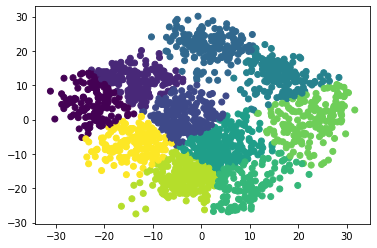

In [197]:
# Plot the predictions reduced data for visualization purposes 
rdata = Kmeans_c(10, 10,reduced_data)
predictc = rdata.predict(reduced_data)
#predict = best_model.predict(X)
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=predictc)

In [50]:
import pandas as pd
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", 
               delimiter = r"\s+", header=None)

In [54]:
# Arranging the 256 columns as a 16x16 matrix
x[0].reshape((16,16))

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

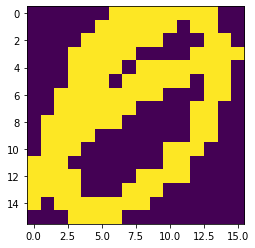

In [56]:
# Visualizing the 16x16 matrix as image
plt.imshow(x[0].reshape((16,16)))

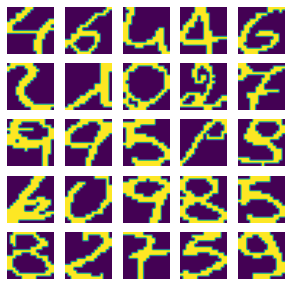

In [57]:
# Visualizing the Image data. Visualizing 25 images from the data as a 5x5 matrix
_, axarr = plt.subplots(5,5,figsize=(5,5))
for i in range(5):
    for j in range(5):
        # Per iteration in the loop, picking one row randomly to display in our 5x5 matrix
        axarr[i,j].imshow(x[np.random.randint(x.shape[0])].reshape((16,16)))          
        axarr[i,j].axis('off') #hiding the axis values for all the 25 images

In [60]:
dfx = pd.DataFrame(x)

In [61]:
x.shape

(1593, 256)

In [63]:
t.shape

(1593, 10)